<a href="https://colab.research.google.com/github/JLUIS14/Inmersion-de-Datos/blob/Principal/credito_banco_aleman_inmersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INMERSION DE DATOS CON PYTHON

In [2]:
# prompt: importa los siguientes modulos con sus respectivos alias: pandas, matplotlib, seaborn, drive de google colab, warnings

# Importa los modulos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount('/content/Drive')
warnings.filterwarnings('ignore')


Mounted at /content/Drive


In [6]:
pd.set_option('display.max_columns', None)
global df_banco, resultados

In [3]:
df_banco = pd.read_csv('/content/Drive/MyDrive/Inmersion/german_credit.csv')
df_banco.head()


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
df_banco.shape


(1000, 21)

In [5]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [6]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [7]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [8]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
columnas

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [9]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columna in columnas:
    print(f'El nombre de la column: {columna}')
    print(list(df_banco[f'{columna}'].value_counts().index))
    print('\n')

El nombre de la column: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la column: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la column: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la column: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la column: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la column: personal_status_sex
['male : single', 'female : di

In [10]:
dic = {'yes': 1, 'no': 0}
df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
df_banco['foreign_worker']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: foreign_worker, Length: 1000, dtype: int64

In [11]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)


In [12]:
procesar_datos()
df_banco.sample(6)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
692,0,2,24,3,5,2896,4,4,2,3,...,1,3,29,3,2,1,3,1,0,1
282,0,3,18,2,5,1445,1,2,4,3,...,4,3,49,1,2,1,2,1,0,1
414,1,1,24,3,1,1381,1,3,4,2,...,2,2,35,3,2,1,3,1,0,1
524,0,2,18,3,5,1113,5,3,4,2,...,4,1,26,3,2,1,2,2,0,1
483,0,4,15,4,4,960,2,2,3,2,...,2,2,30,3,2,2,3,1,0,1
511,0,4,36,3,2,4686,5,3,2,3,...,2,4,32,3,3,1,4,1,1,1


In [13]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].tail(5)

,personal_status_sex,age,duration_in_month,credit_amount,default
995,2,31,12,1736,0
996,1,40,30,3857,0
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [14]:
dic_sexo ={2:1, 5:1, 1:0, 3:0, 4:0}
df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)


In [15]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [16]:
feature_engineering()
df_banco.head(5)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,...,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,...,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,...,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,...,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,...,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,...,2,3,2,0,1,0,1,4,2,5


In [17]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,...,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,...,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,...,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,...,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,...,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,...,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


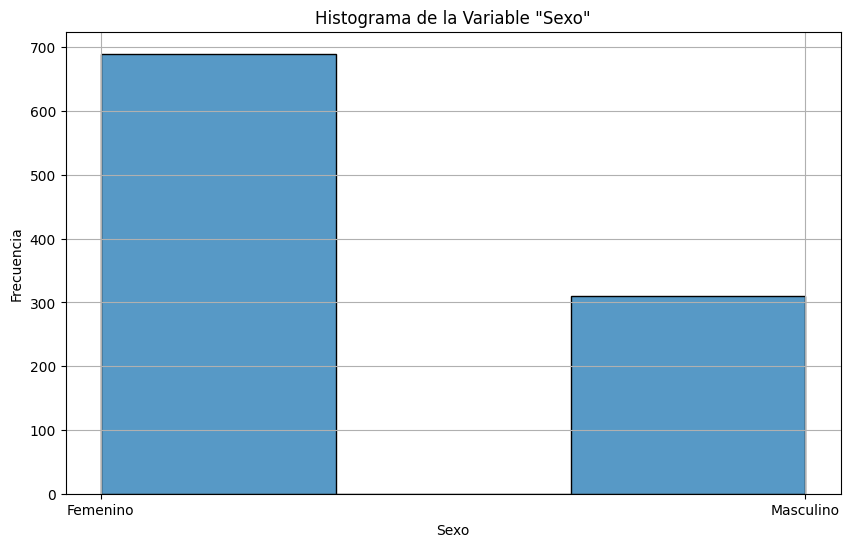

In [18]:

# Suponiendo que df_banco ya está definido y contiene una columna 'sexo'
# Vamos a crear el histograma

plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.histplot(df_banco['sexo'], bins=3, kde=False)  # Histograma con seaborn

plt.title('Histograma de la Variable "Sexo"')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'])  # Ajustar etiquetas si los valores son 0 y 1
plt.grid(True)

plt.show()


In [19]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

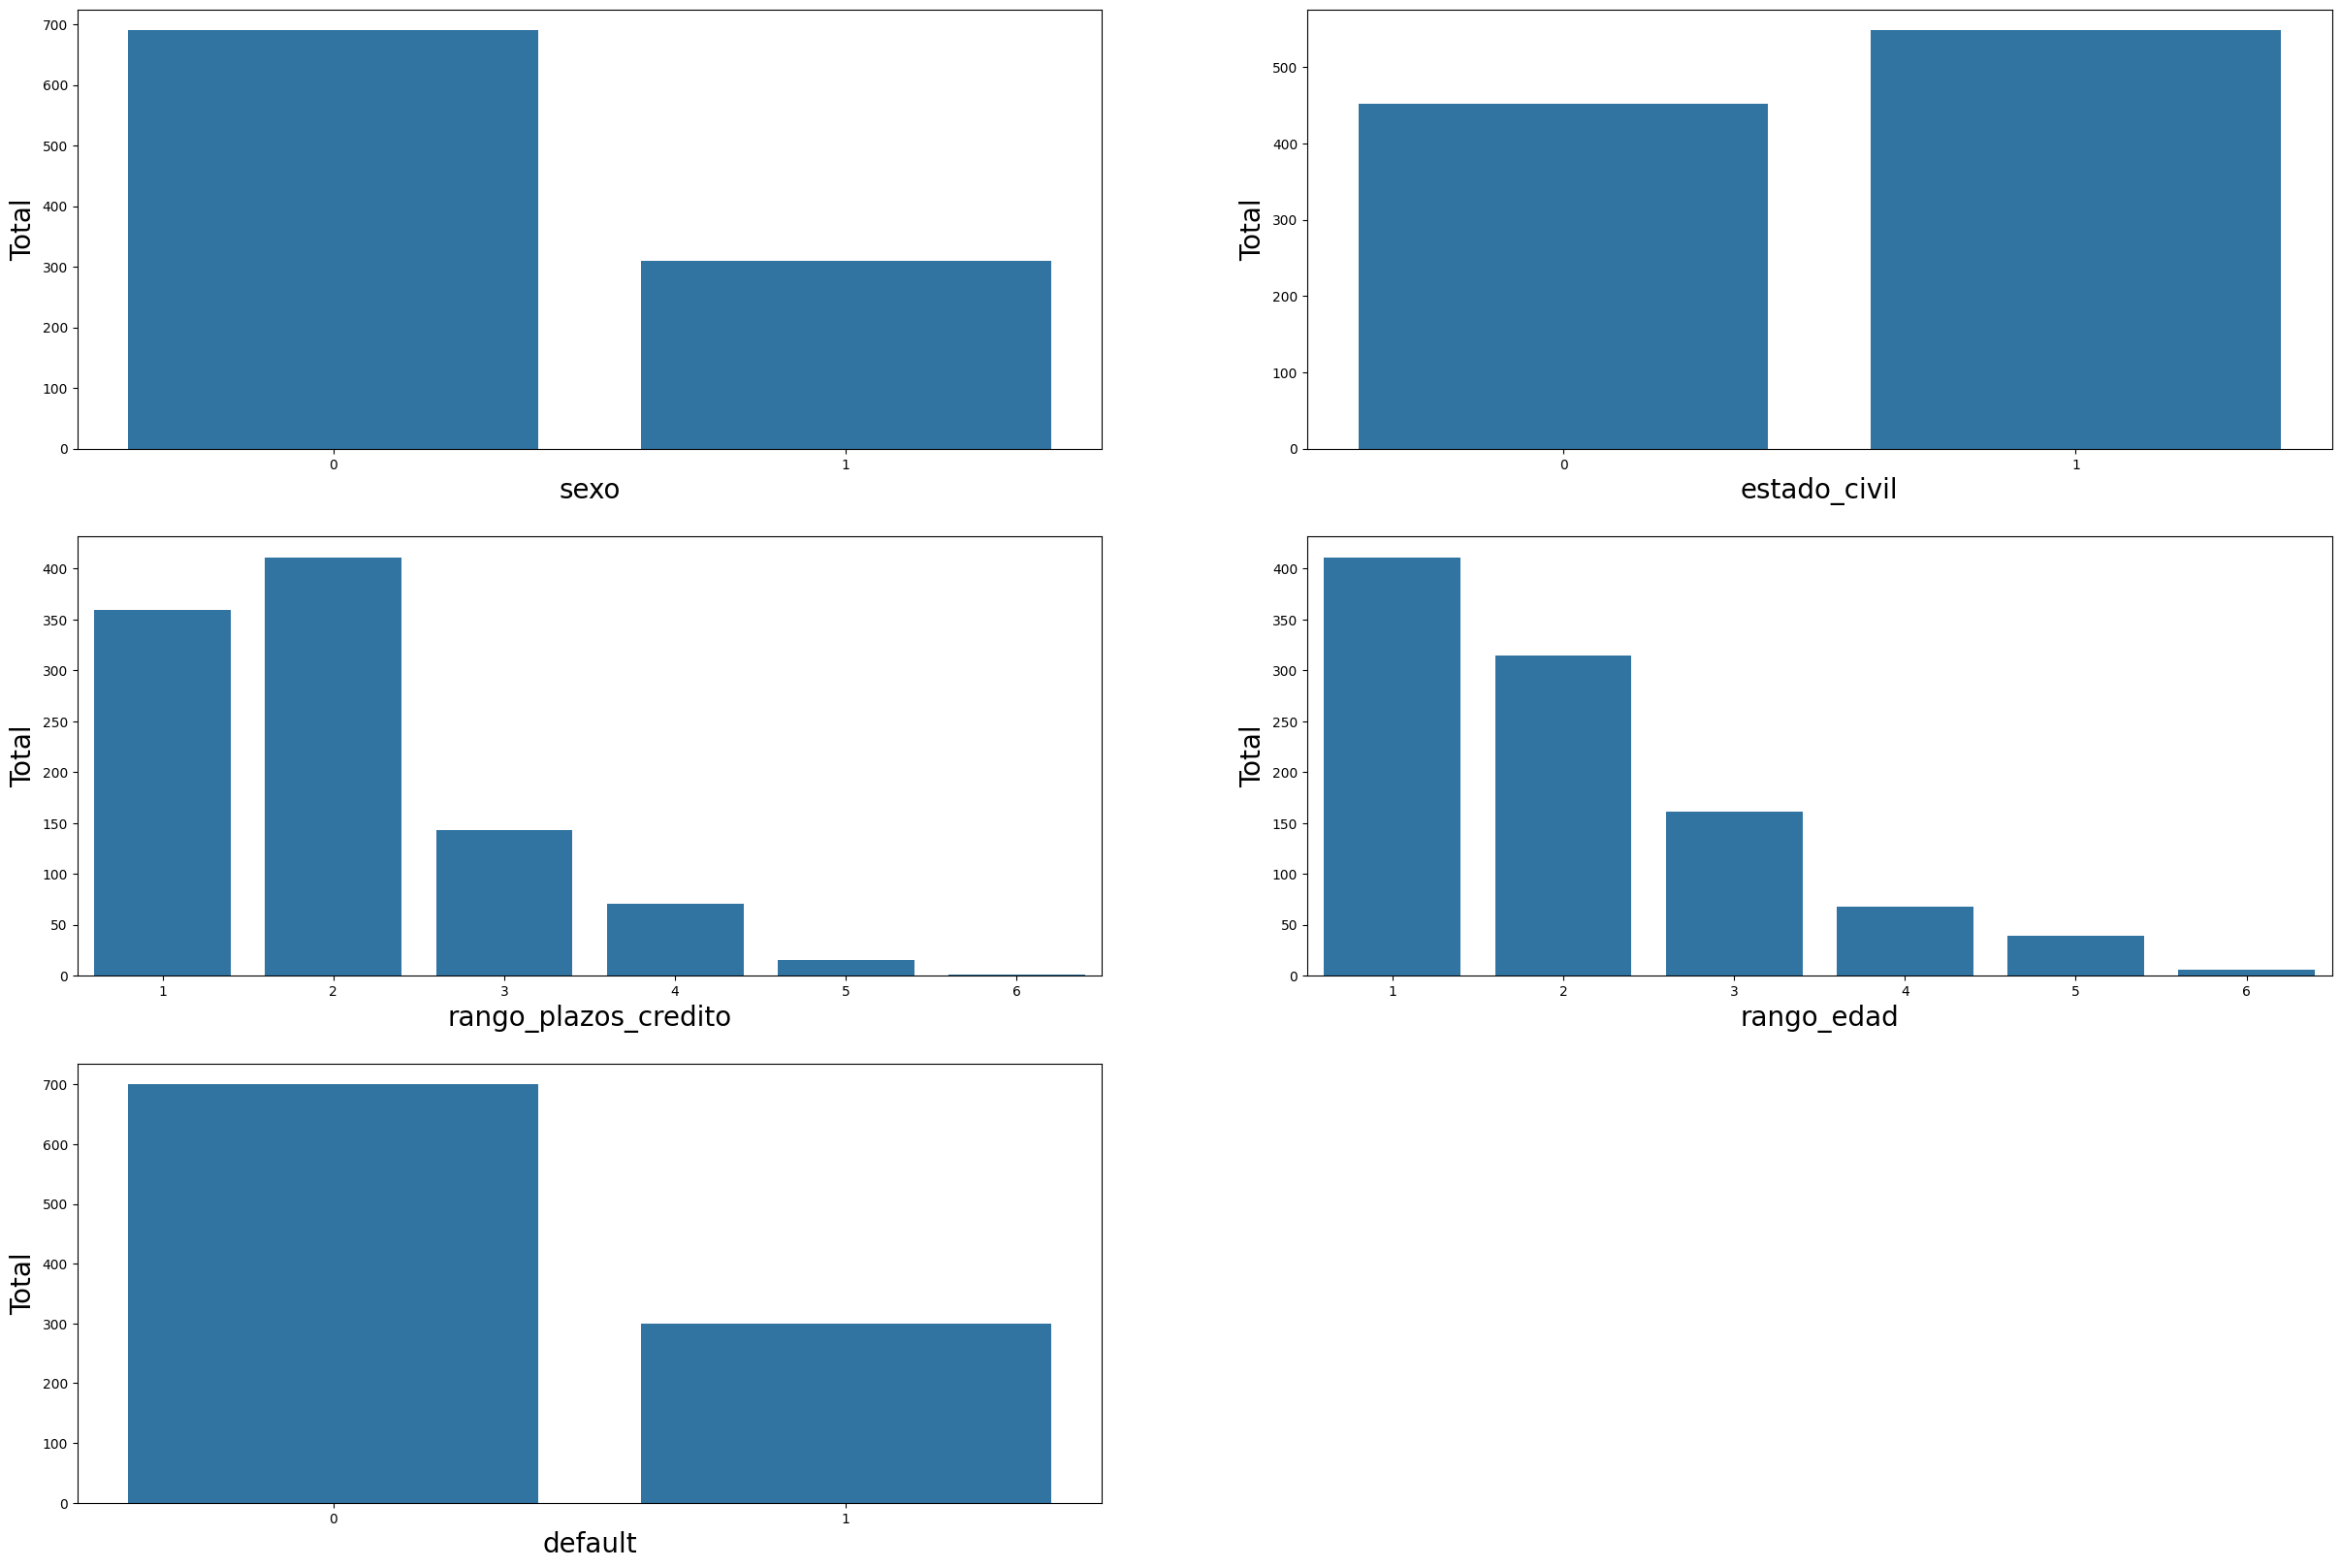

In [20]:
analisis_exploratorio()

analizar los datos de las distribuciones e identificar si hay algun valor o registro que no se debe considerar en el modelo

como hacer un mapa de calor investigar y como crear, para entender un comportamiento entre una variable y la otra y decir cuales de las variables van ha impactar mas.

crear una conclusion para cada histograma

In [21]:
def visualizar_histogramas(df_banco):
    histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
    plt.figure(figsize = (30,20))
    plt.suptitle('Histogramas de Variables Categóricas', fontsize=30)
    for idx, col in enumerate(histogramas):
        plt.subplot(3, 2, idx+1)
        sns.countplot(x = col, data = df_banco)
        plt.xlabel(col, fontsize=20)
        plt.ylabel('Total', fontsize=20)
    plt.show()

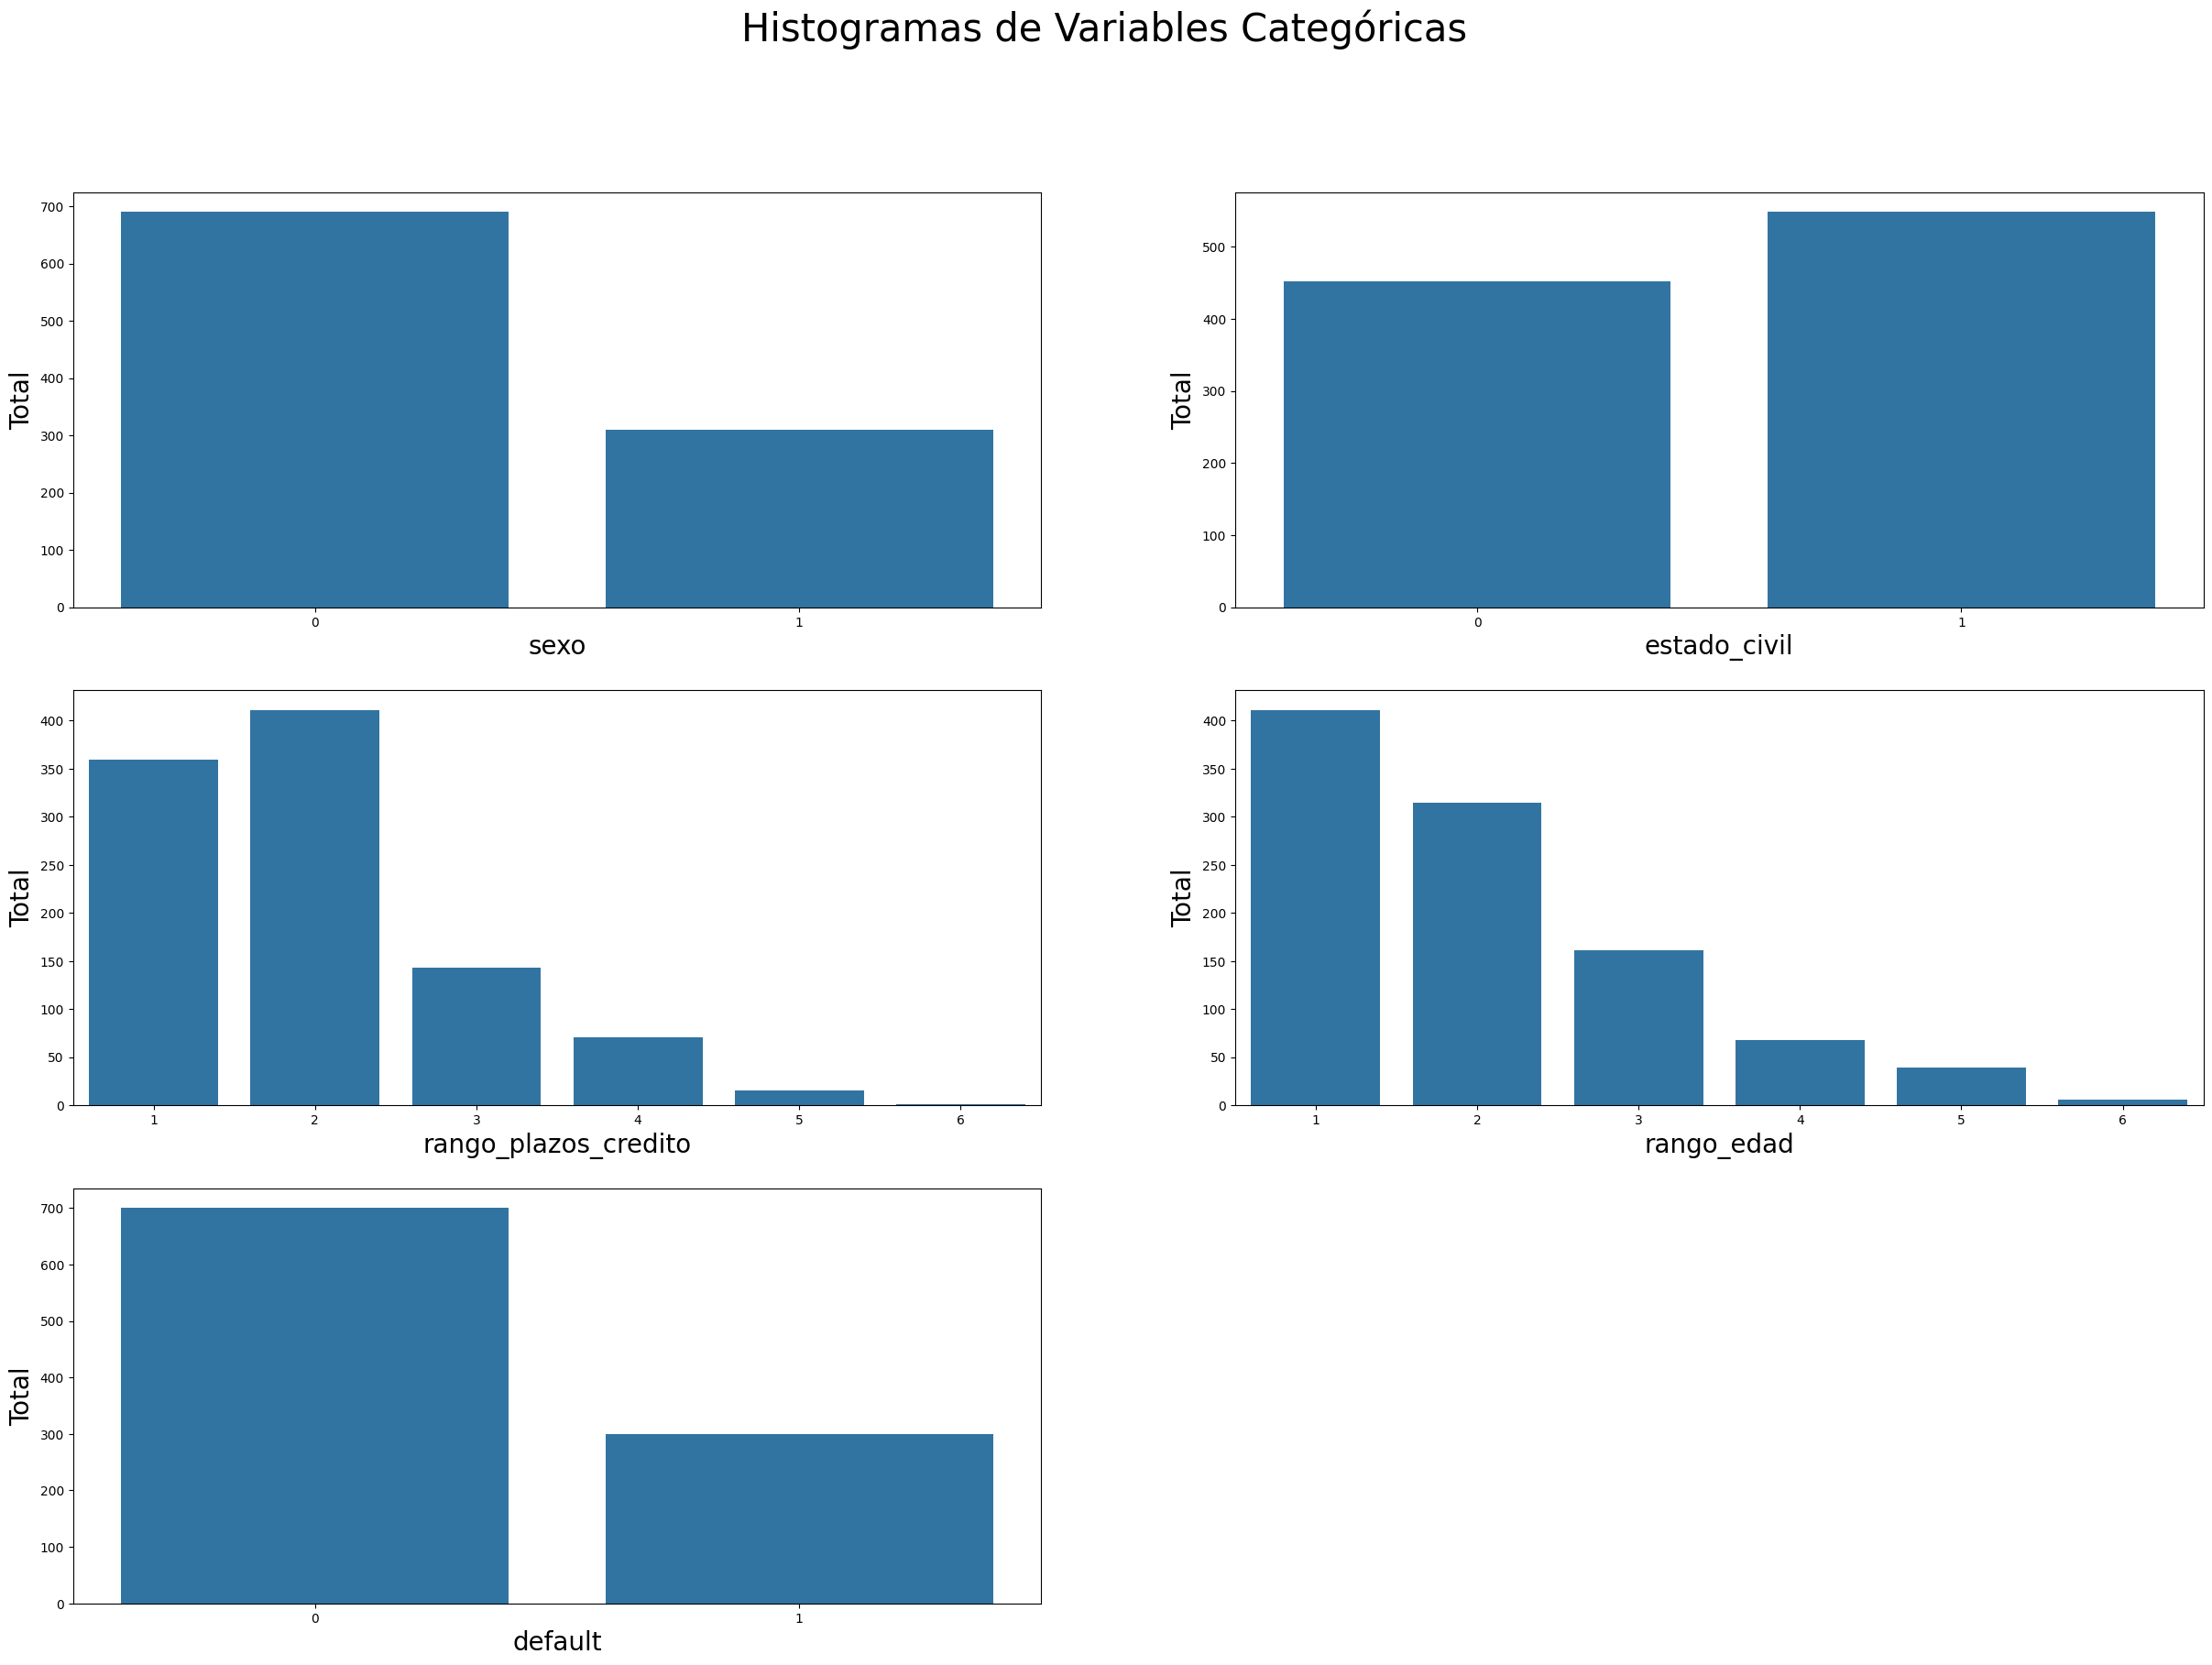

In [22]:
visualizar_histogramas(df_banco)

In [23]:
def visualizar_boxplots(df_banco):
    # Calculate the number of rows needed for subplots
    num_cols = len(df_banco.select_dtypes(include=['number']).columns)
    num_rows = (num_cols + 1) // 2  # Calculate the number of rows required

    plt.figure(figsize = (60,30))
    plt.suptitle('Boxplots de Variables Numéricas', fontsize=30)
    for idx, col in enumerate(df_banco.select_dtypes(include=['number']).columns):
        # Use num_rows in the subplot grid definition
        plt.subplot(num_rows, 2, idx+1)
        sns.boxplot(y = col, data = df_banco)
        plt.xlabel(col, fontsize=20)
    plt.show()

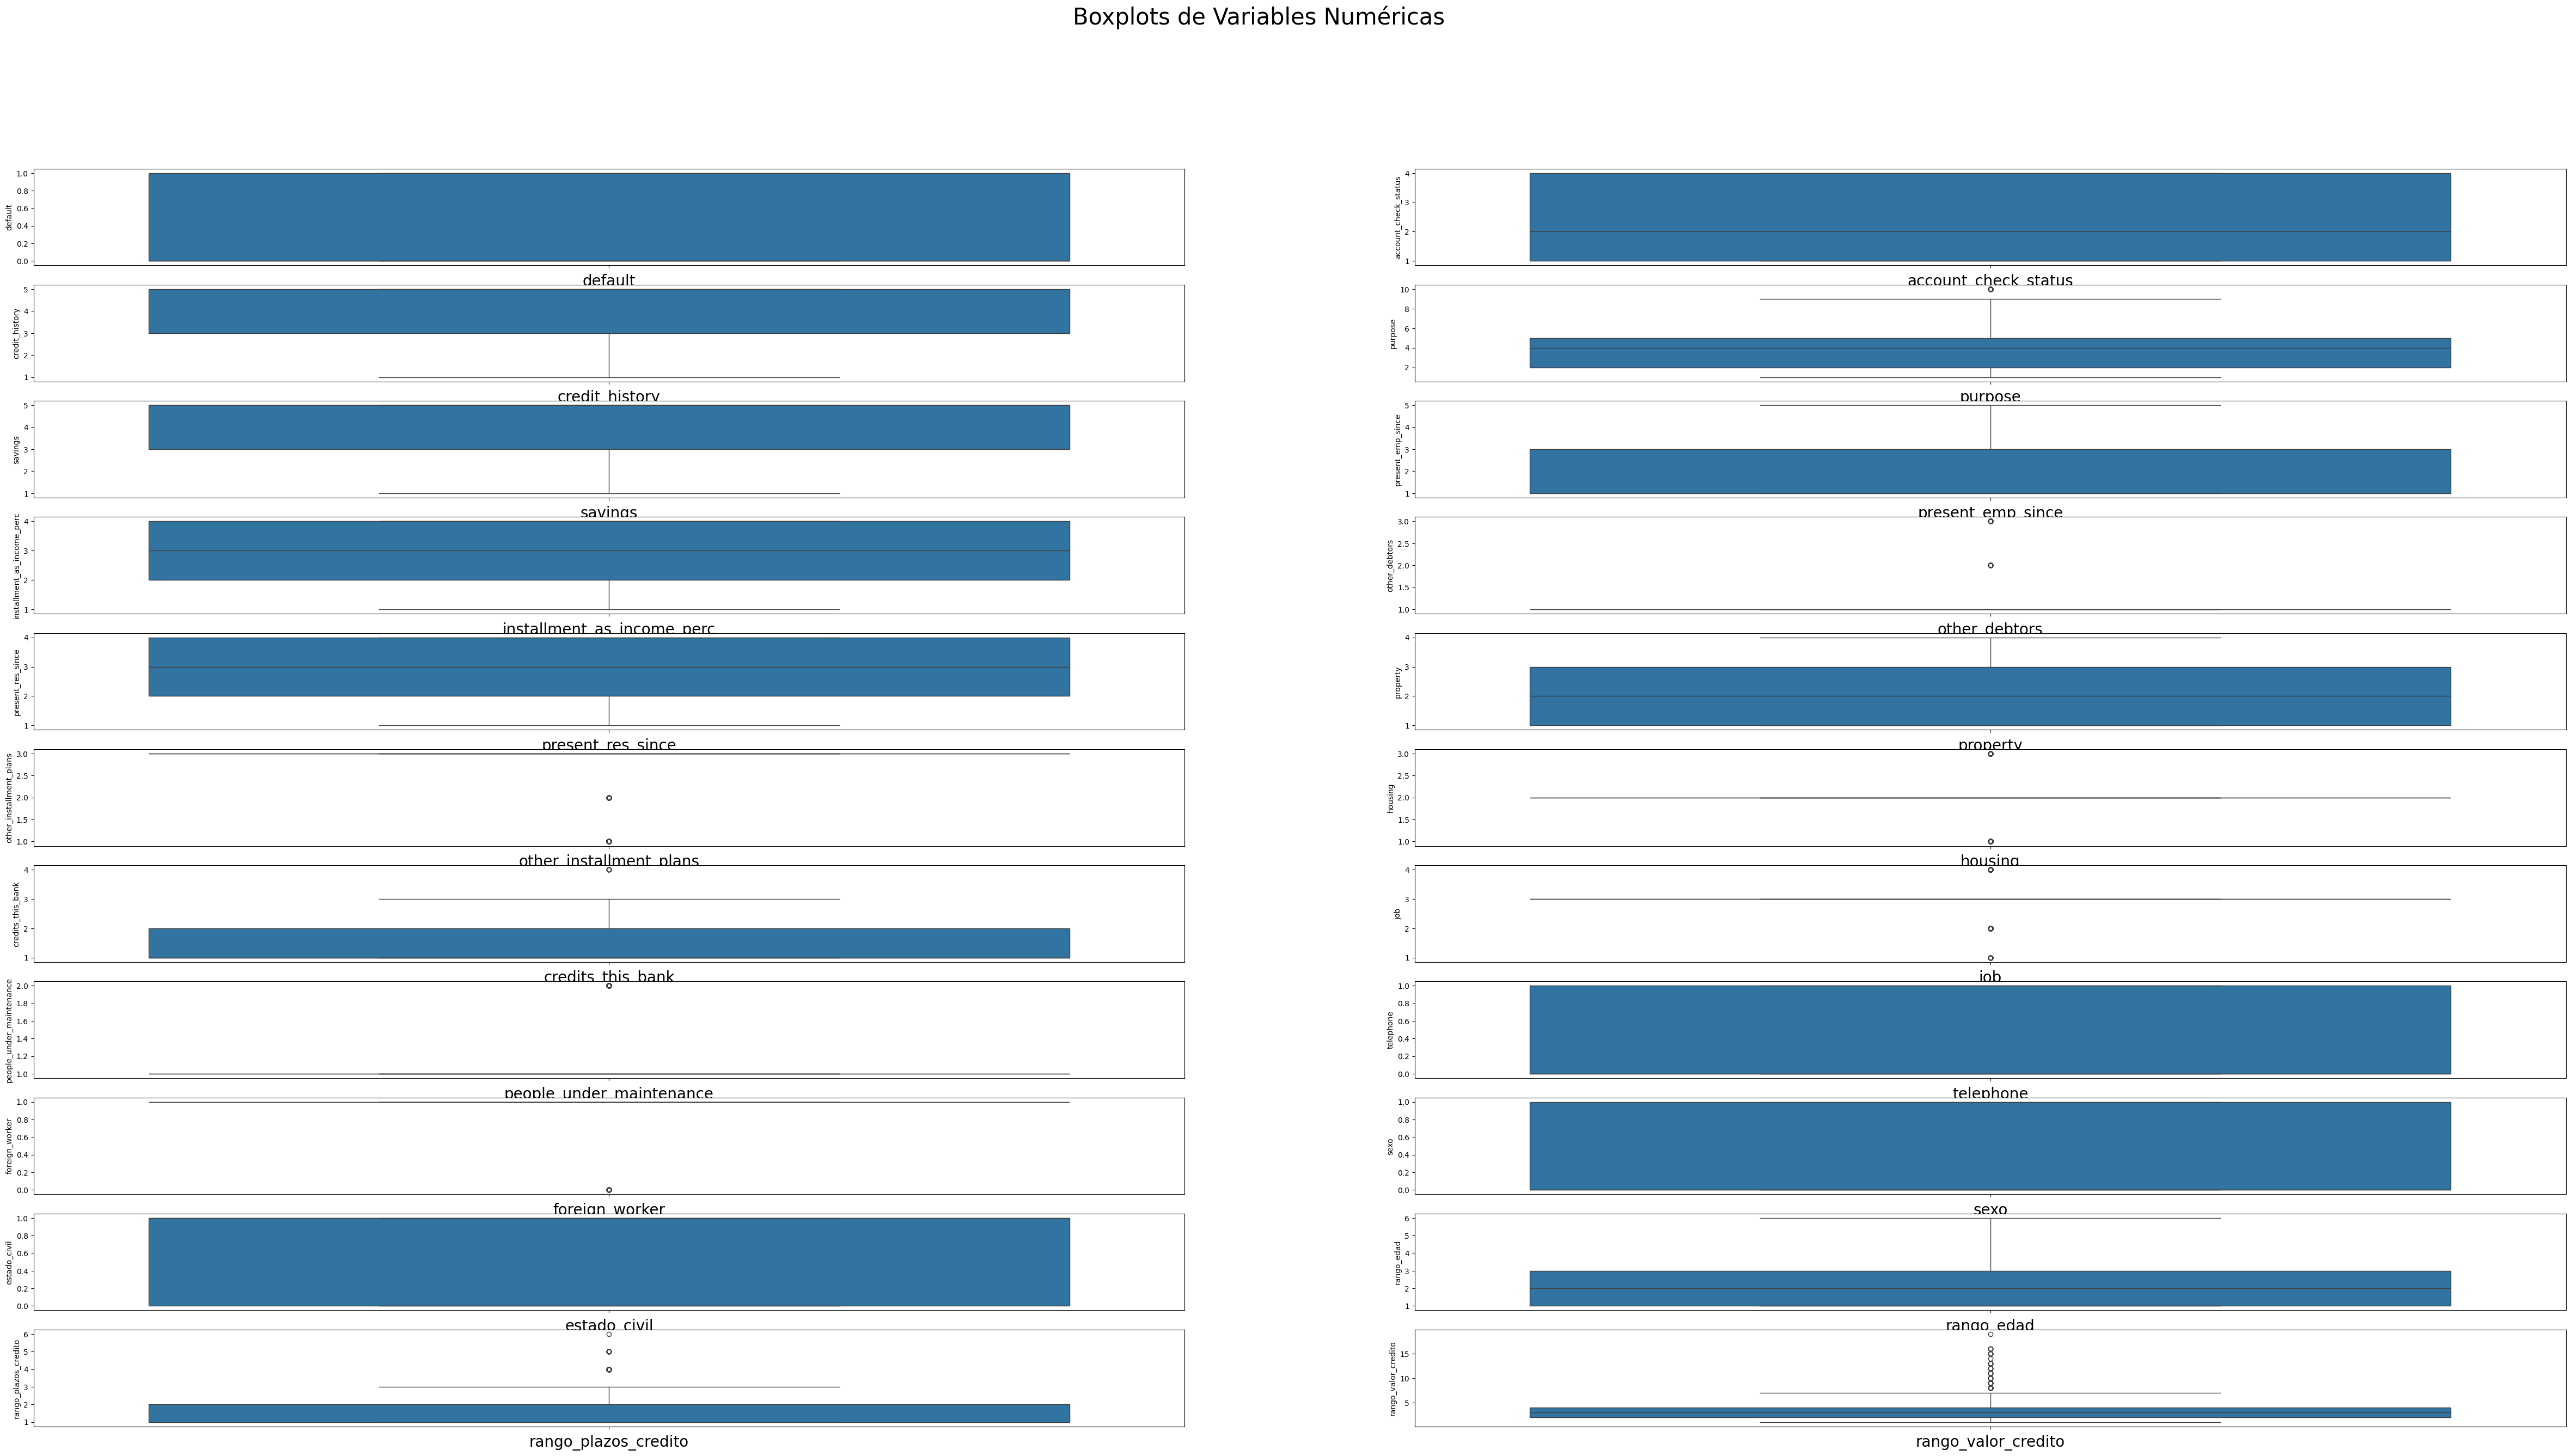

In [24]:
visualizar_boxplots(df_banco)

In [25]:
def mostrar_estadisticas_descriptivas(df_banco):
    print(df_banco.describe())

In [26]:
mostrar_estadisticas_descriptivas(df_banco)

           default  account_check_status  credit_history      purpose  \
count  1000.000000           1000.000000      1000.00000  1000.000000   
mean      0.300000              2.577000         3.54500     4.277000   
std       0.458487              1.257638         1.08312     2.739302   
min       0.000000              1.000000         1.00000     1.000000   
25%       0.000000              1.000000         3.00000     2.000000   
50%       0.000000              2.000000         3.00000     4.000000   
75%       1.000000              4.000000         5.00000     5.000000   
max       1.000000              4.000000         5.00000    10.000000   

           savings  present_emp_since  installment_as_income_perc  \
count  1000.000000        1000.000000                 1000.000000   
mean      3.895000           2.616000                    2.973000   
std       1.580023           1.208306                    1.118715   
min       1.000000           1.000000                    1.000000 

In [43]:
def analizar_valores_faltantes(df_banco):
    missing_values = df_banco.isnull().sum()
    print(f'Valores faltantes en el DataFrame:\n{missing_values}')

In [44]:
analizar_valores_faltantes(df_banco)

Valores faltantes en el DataFrame:
default                       0
account_check_status          0
credit_history                0
purpose                       0
savings                       0
present_emp_since             0
installment_as_income_perc    0
other_debtors                 0
present_res_since             0
property                      0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
sexo                          0
estado_civil                  0
rango_edad                    0
rango_plazos_credito          0
rango_valor_credito           0
dtype: int64


In [27]:
def analizar_correlacion(df_banco):
    plt.figure(figsize=(20,10))
    sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correlación', fontsize=20)
    plt.show()

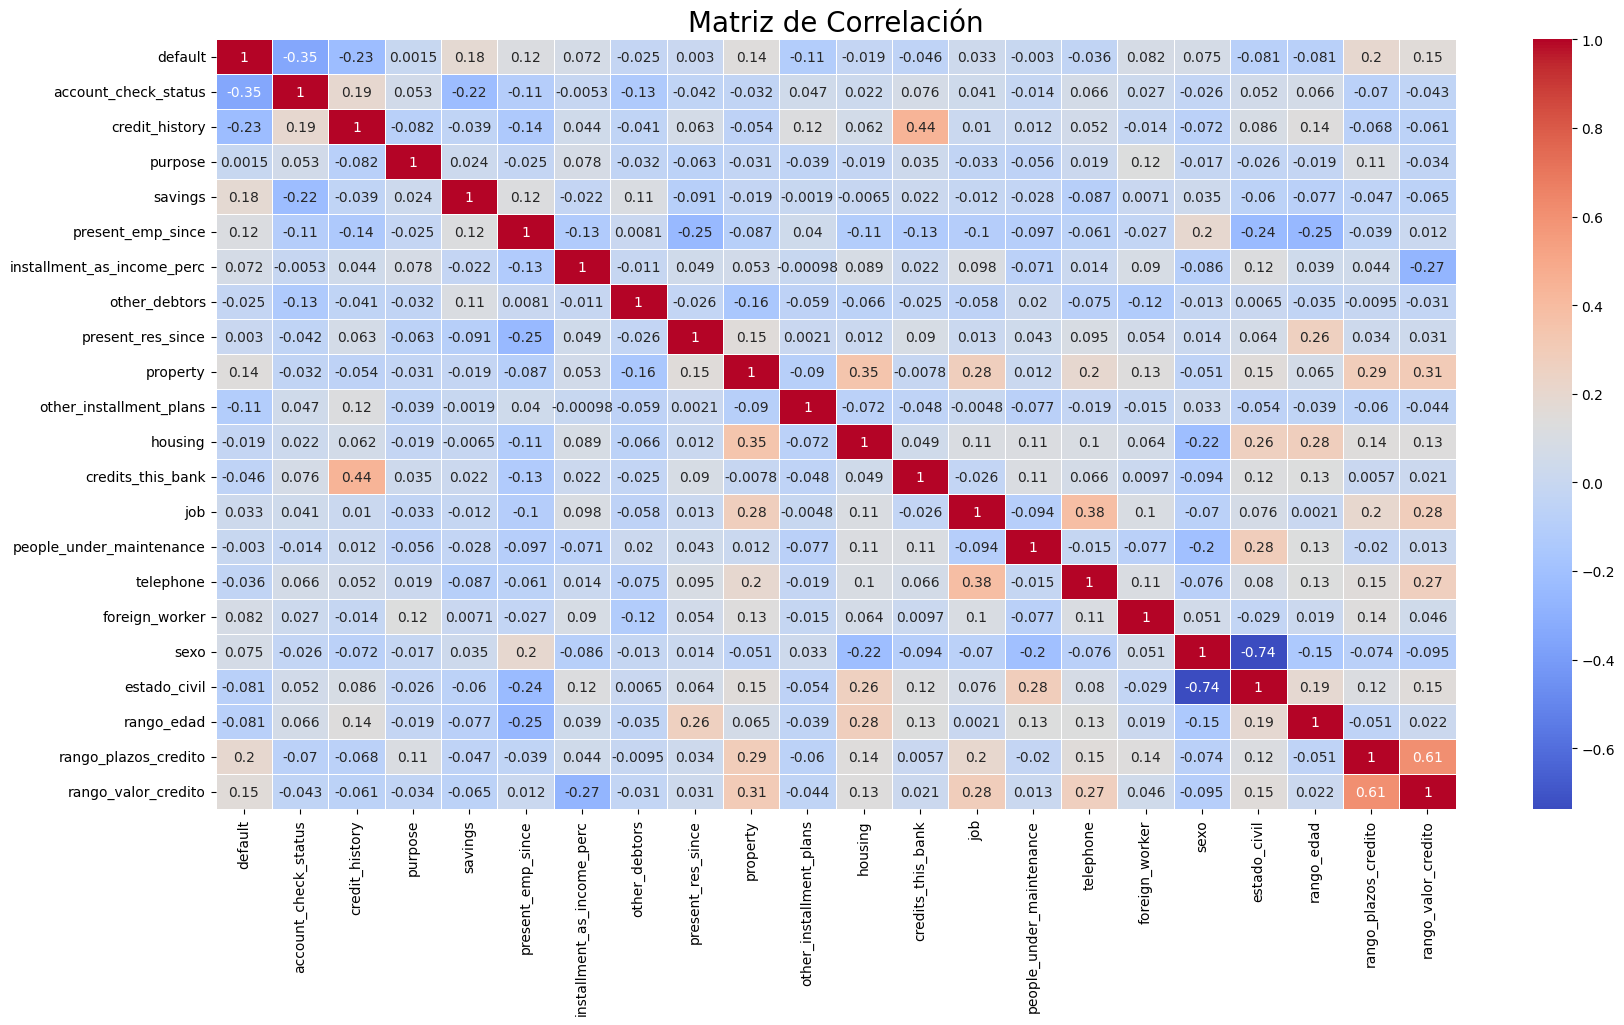

In [28]:
analizar_correlacion(df_banco)

In [29]:
import pandas as pd

# Asumiendo que df_banco ya está definido

# Calcular los cuartiles y el IQR para cada columna numérica
Q1 = df_banco.quantile(0.25)
Q3 = df_banco.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos eliminando los outliers
df_banco_sin_outliers = df_banco[~((df_banco < lower_bound) | (df_banco > upper_bound)).any(axis=1)]

# Mostrar las primeras filas del DataFrame sin outliers
print(df_banco_sin_outliers.head())


    default  account_check_status  credit_history  purpose  savings  \
0         0                     1               5        5        1   
6         0                     4               3        4        3   
12        0                     2               3        5        5   
16        0                     4               5        5        1   
20        0                     4               5        1        5   

    present_emp_since  installment_as_income_perc  other_debtors  \
0                   1                           4              1   
6                   1                           3              1   
12                  3                           1              1   
16                  1                           4              1   
20                  3                           4              1   

    present_res_since  property  ...  credits_this_bank  job  \
0                   4         1  ...                  2    3   
6                   4         2  ...

In [48]:
from scipy import stats
import numpy as np

# Calcular el Z-score para cada columna numérica
z_scores = np.abs(stats.zscore(df_banco.select_dtypes(include=[np.number])))

# Definir un umbral para identificar los outliers (típicamente 3)
threshold = 3

# Filtrar los datos eliminando los outliers
df_banco_sin_outliers = df_banco[(z_scores < threshold).all(axis=1)]

# Mostrar las primeras filas del DataFrame sin outliers
print(df_banco_sin_outliers.head())


   default  account_check_status  credit_history  purpose  savings  \
0        0                     1               5        5        1   
1        1                     2               3        5        5   
2        0                     4               5        8        5   
4        1                     1               4        1        5   
5        0                     4               3        8        1   

   present_emp_since  installment_as_income_perc  other_debtors  \
0                  1                           4              1   
1                  3                           2              1   
2                  2                           2              1   
4                  3                           3              1   
5                  3                           2              1   

   present_res_since  property  other_installment_plans  housing  \
0                  4         1                        3        2   
1                  2         1          

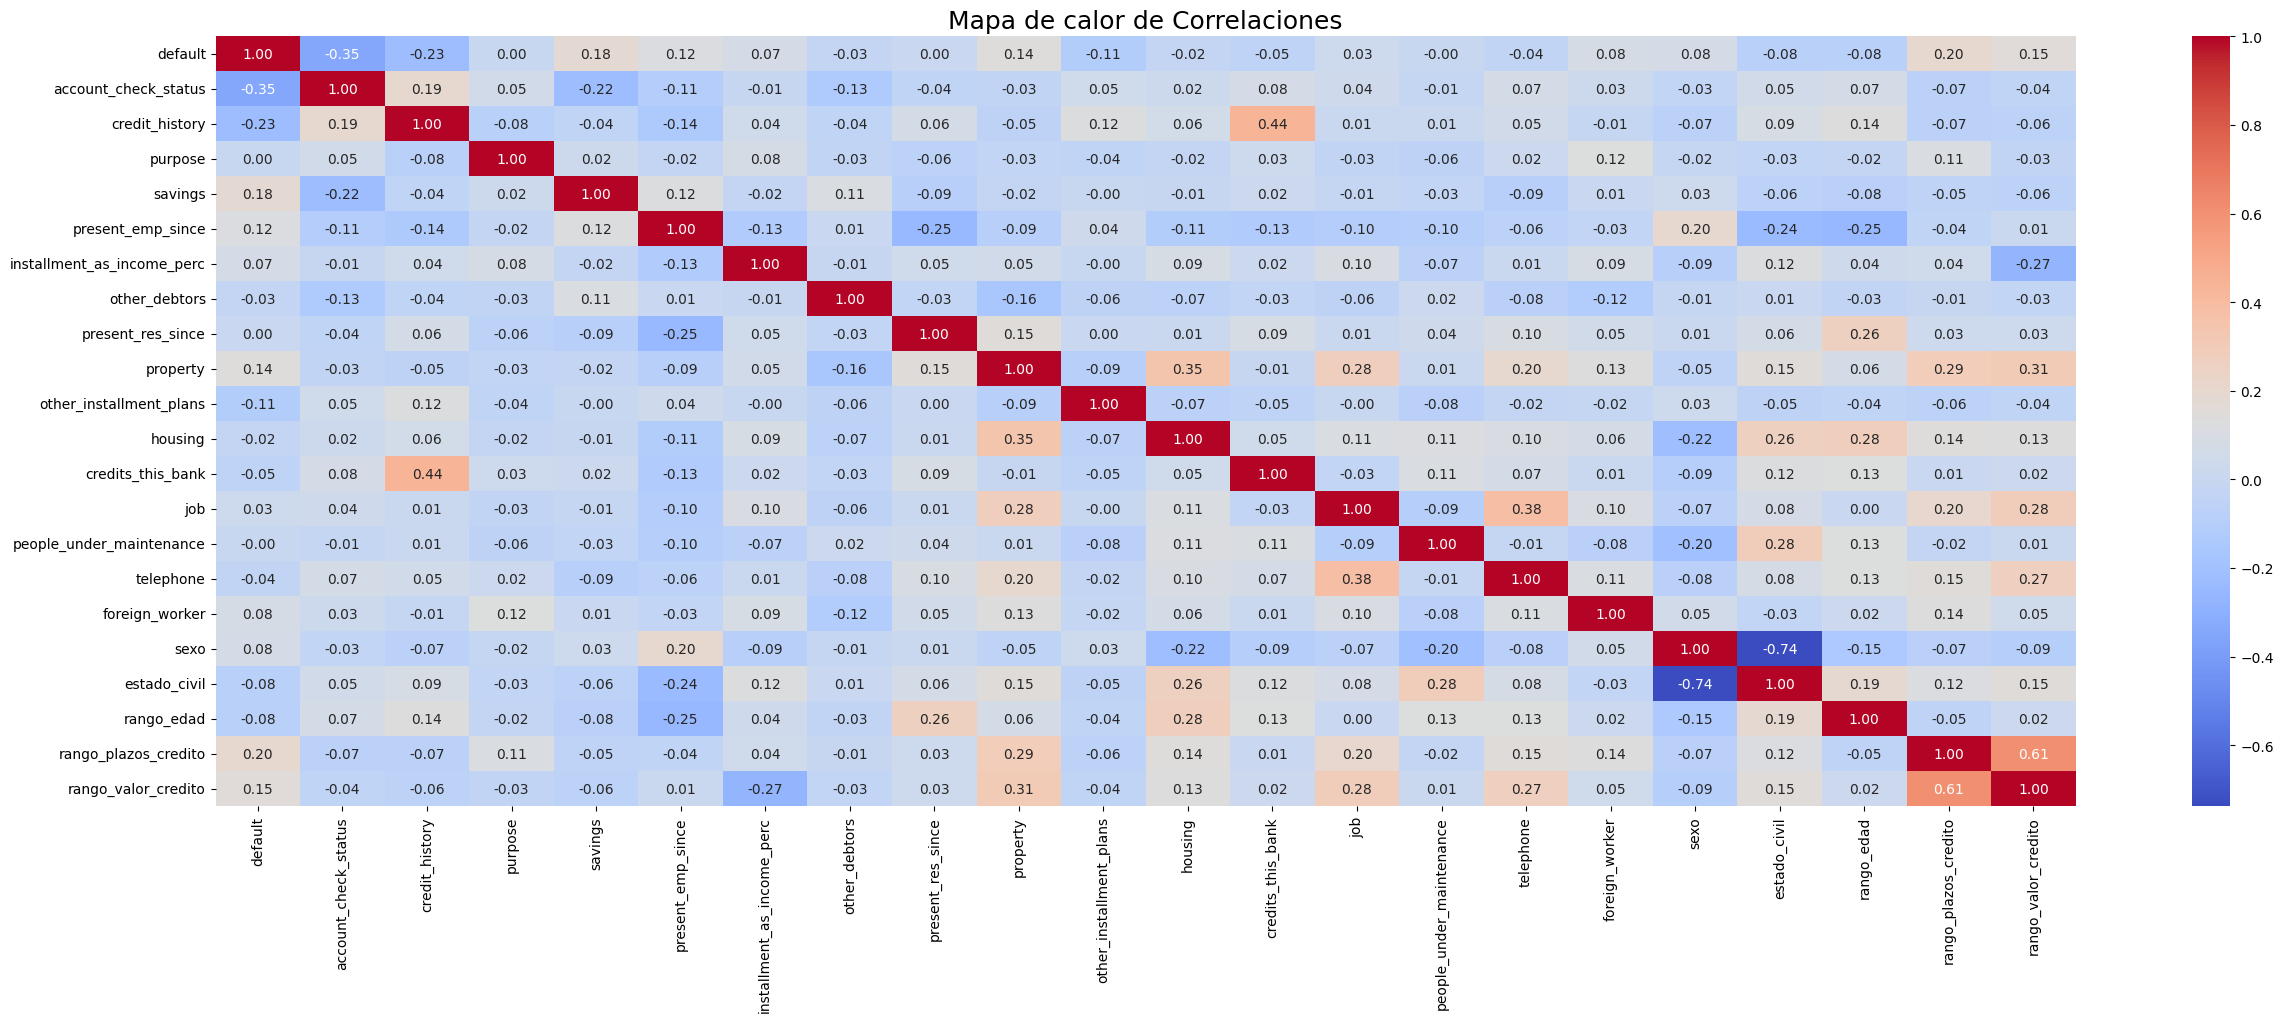

In [30]:
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de Correlaciones', fontsize=18)
plt.show()

In [68]:
# prompt: importar las siguientes bibliotecas: train_test_split, logisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [69]:
# prompt: por favor generame un modelo de machine learning de clasificacion en phyton

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_banco.drop('default', axis=1)
y = df_banco['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.795
Precision: 0.6956521739130435
Recall: 0.5423728813559322
F1-score: 0.6095238095238096


#@title

In [70]:


def crea_modelos():
  global df_banco, resultados
  y = df_banco['default']
  X = df_banco.drop(columns = 'default')
  train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=77)

  models = {
      'Regresion Logistica': LogisticRegression(),
      'Arbol de Decision': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }
  results ={'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC-ROC': []}

  for name, model in models.items():
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)
    roc_auc = roc_auc_score(test_y, predictions)


    if hasattr(model, 'predict_proba'):
      proba = model.predict_proba(test_x)
      roc_auc = roc_auc_score(test_y, proba[:, 1])
    else:
      roc_auc = None
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['AUC-ROC'].append(roc_auc)

    # Generar y mostrar la matriz de confusión
    conf_matrix = confusion_matrix(test_y, predictions)
    print(f"Matriz de Confusión para {name}:\n", conf_matrix)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Default', 'Default'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusión - {name}')
    plt.show()

  resultados = results


Matriz de Confusión para Regresion Logistica:
 [[196  18]
 [ 48  38]]


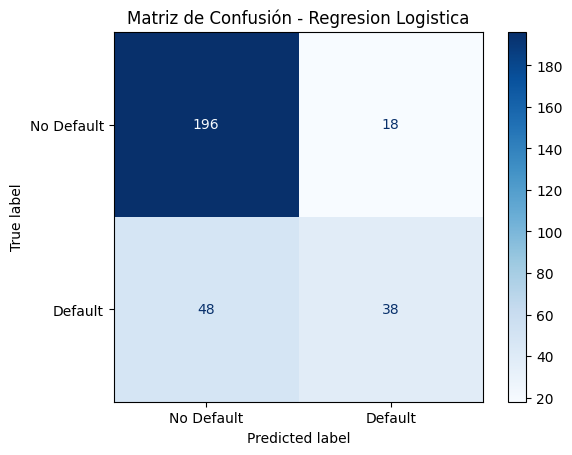

Matriz de Confusión para Arbol de Decision:
 [[176  38]
 [ 48  38]]


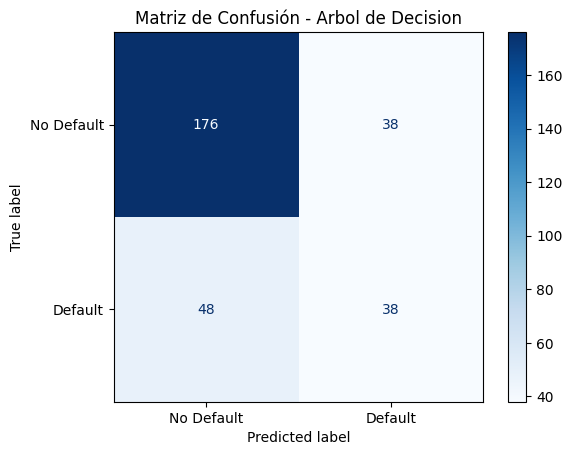

Matriz de Confusión para Random Forest:
 [[199  15]
 [ 50  36]]


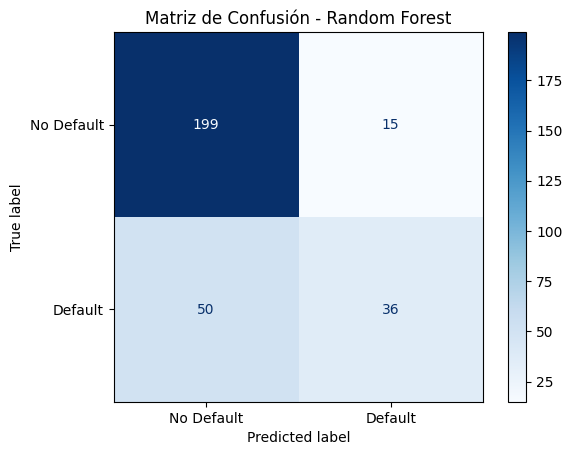

Matriz de Confusión para Naive Bayes:
 [[175  39]
 [ 39  47]]


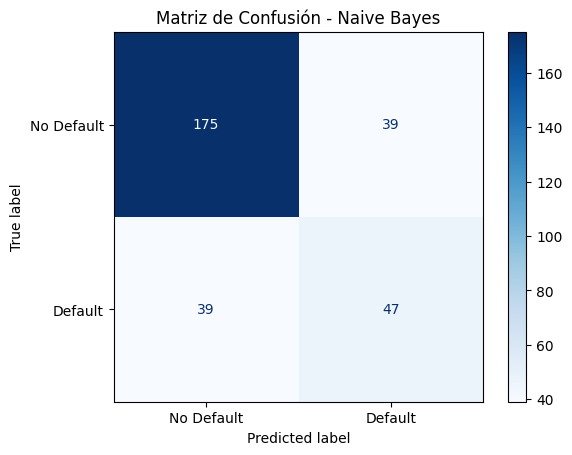

Regresion Logistica
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Arbol de Decision
0.7133333333333334
0.5
0.4418604651162791
0.46913580246913583
0.6321451858291675


Random Forest
0.7833333333333333
0.7058823529411765
0.4186046511627907
0.5255474452554746
0.7874918495979134


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




In [71]:
crea_modelos()
for i, model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-Score'][i])
  print(resultados['AUC-ROC'][i])

  print('\n')


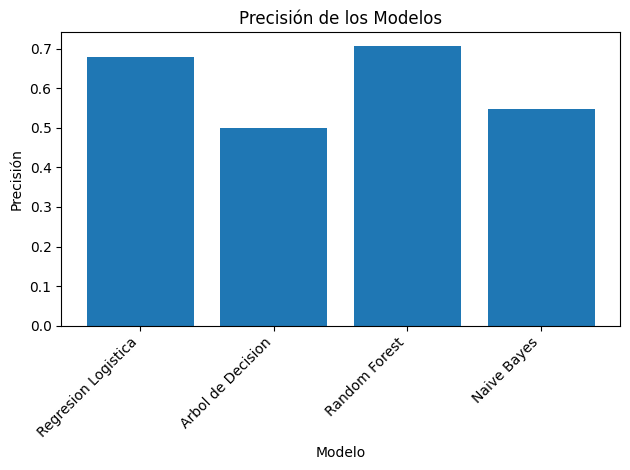

In [72]:
# prompt: como generar un grafico de barra a partir de un dataframe

import matplotlib.pyplot as plt

# Supongamos que 'resultados' es tu DataFrame
# y quieres graficar la precisión de cada modelo

plt.bar(resultados['Model'], resultados['Precision'])
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.title('Precisión de los Modelos')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()


In [73]:
def visualiza_resultados():
    global df_banco, resultados
    results_df = pd.DataFrame(resultados)
    results_df.set_index('Model', inplace=True)

    results_df =results_df.T
    colors = ['#0077b6', '#CDDBF3', '#2ca02c', '#d62728']

    results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
    plt.title('Comparación de Métricas por Modelo')
    plt.xlabel('Métricas')
    plt.ylabel('puntuacion')
    plt.legend(title='Modelos')
    plt.tight_layout()
    plt.show()

    from IPython.display import HTML, display

    texto = 'cual de estos modelos seleccionarias y porque'
    display(HTML(f'<div style="text-align: center;">{texto}</div>'))
    display(results_df)

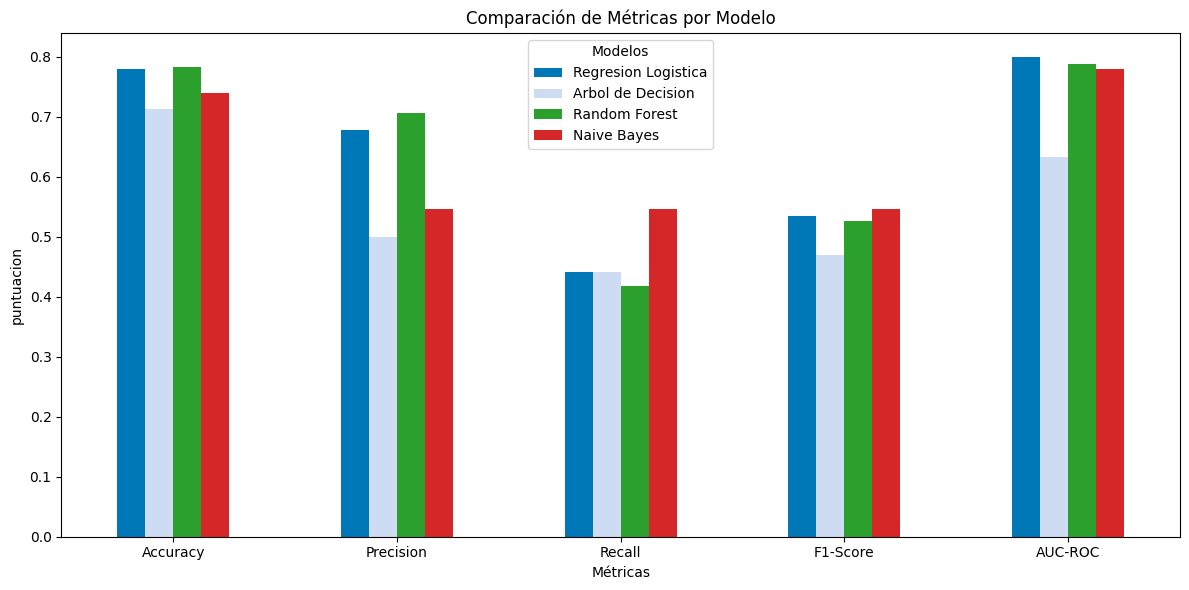

Model,Regresion Logistica,Arbol de Decision,Random Forest,Naive Bayes
Accuracy,0.780000,0.713333,0.783333,0.740000
Precision,0.678571,0.500000,0.705882,0.546512
Recall,0.441860,0.441860,0.418605,0.546512
F1-Score,0.535211,0.469136,0.525547,0.546512
AUC-ROC,0.799935,0.632145,0.787492,0.780048


In [74]:
visualiza_resultados()

Questions: como se trata la matriz de confusion: se analiza de acuerdo a los resultados de las cantidades de verdaderos positivos y verdaderos negativos los cuales nos indican que las predicciones son las correctas, mientras que los falsos positivos y los falsos negativos nos indican que hay errores en la prediccion del modelo aplicado. cual es la variable respuesta que debemos tener en cuenta para obtener la respuesta?, son los Ture Positivo y los True Negativos. eso esta desarrollado y se muestra en los graficos de las matriz de confusion de cada modelo.

